<a href="https://colab.research.google.com/github/mfhars/new1/blob/main/Another_copy_of_FINAL_EXAMINATION_ABDUL_NGGOFUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instructions**

**1. Data Cleaning**

**2. Data Correlation**
* Explore data correlations using correlation matrices, pair plots, etc.
* Understand relationships between features and target variable

**3. Classification Algorithms & Confusion Matrix**
* Random Forest Classifier
* Support Vector Machine (SVM) Classifier
* K-Nearest Neighbors (KNN) Classifier
* Logistic Regression Classifier
* Decision Tree Classifier


**4. Neural Network with Multilayer Perceptron(MLP)**

**5. Feature Extraction Random Forest Classifier VS Neural Network with Multilayer Perceptron(MLP)**
* Feature Extraction using PCA
* *Analysis for anomaly detection and visualization with classes*
* *Elbow Method and Silhouette Score*

**6. Confusion Matrix**
* Random Forest Classifier VS Neural Network with Multilayer Perceptron(MLP)

**7. Compare the models**

* Random Forest vs. Neural Network (MLP)
* Comparing Classifiers
* Evaluation in the Context of Dimensionality Reduction



##**1. Data Cleaning**

IMPORTING THE RELEVANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



In [ ]:
# Load Wine dataset and create a DataFrame
from sklearn.datasets import load_wine
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
wine_df.describe(include='all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


##**2. Data Correlation**

In [ ]:
wine_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


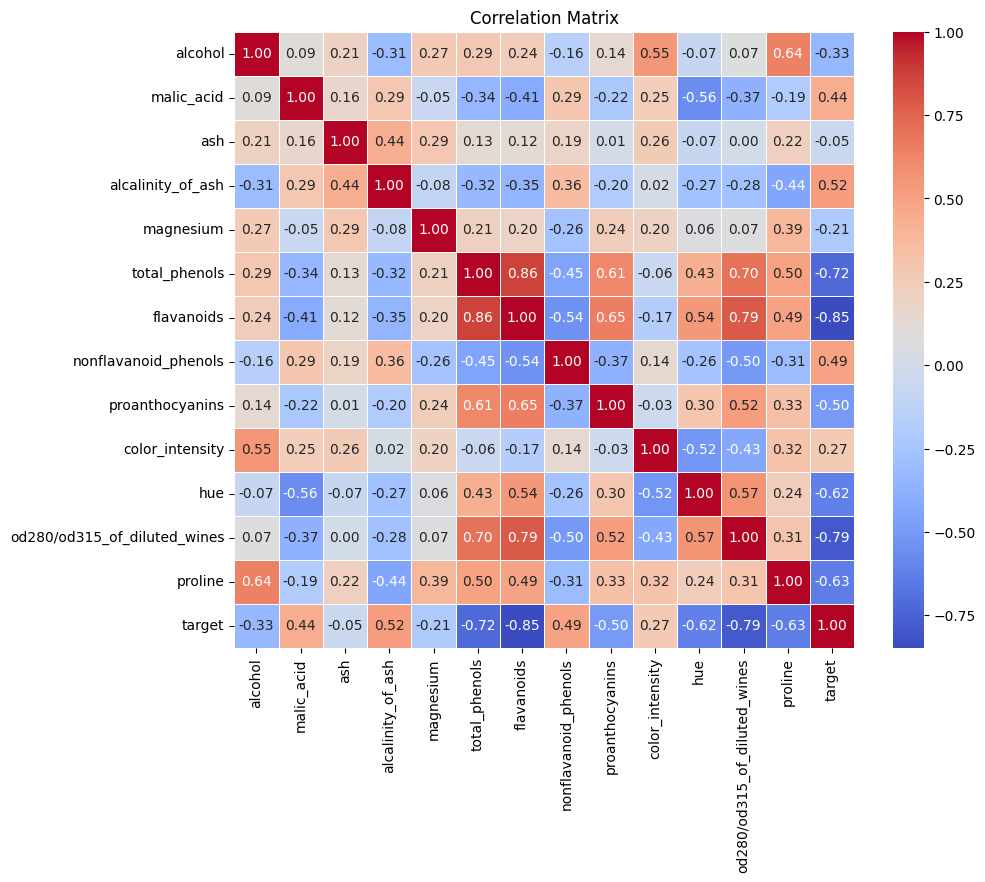

In [ ]:
# Compute the correlation matrix
correlation_matrix = wine_df.corr()

# Create the correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## **Understanding the Values:**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation (close to 1 or -1), it indicates a strong relationship between the two variables. A correlation of 1 means a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

Here are some observations based on the visible data:

## **Observations:**

*   **Total Phenols and Flavonoids:** There is a strong positive correlation (0.86) between total phenols and flavonoids. This suggests that wines with higher concentrations of total phenols also tend to have higher concentrations of flavonoids.
*  **Flavonoids and Target (which might indicate quality or a specific characteristic of wine):** Flavonoids have a strong negative correlation with the target variable (-0.85). This could imply that higher levels of flavonoids are associated with a lower value of the target variable.
*   **Proline and Target:** Proline, an amino acid, also has a strong negative correlation with the target variable (-0.63). This suggests that wines with higher proline levels may be associated with lower values of the target variable.
*  **Color Intensity and Target:** There is a moderate positive correlation (0.27) between color intensity and the target. This could mean that wines with more intense color might have a higher value of the target variable.
*  **Alcohol and Malic Acid:** These two variables have a very low correlation (0.09), indicating almost no linear relationship between them.

## **Physical Meaning and Justification:**

* **Total Phenols and Flavonoids:** Phenolic compounds, including flavonoids, are important in wine as they contribute to the taste, color, and mouthfeel. The strong correlation might be due to shared biosynthetic pathways in grapes.

* **Flavonoids and Target:** If the target variable represents wine quality, a negative correlation with flavonoids could indicate that higher flavonoid content is perceived to decrease quality. Alternatively, if the target represents a specific wine characteristic (like a type of wine), it might suggest that certain types are characterized by lower flavonoid levels.

* **Proline and Target:** Proline levels are often higher in grapes grown in more arid conditions or from specific grape varieties. If the target is related to wine quality or a particular wine style, this correlation could be indicative of environmental or varietal influences.

* **Color Intensity and Target:** The color intensity in wine can be influenced by factors like grape variety, winemaking practices, and aging. A positive correlation with the target suggests that these factors may be associated with the characteristics or quality captured by the target variable.

* **Alcohol and Malic Acid:** The lack of correlation suggests that the alcohol content in wine does not depend linearly on the amount of malic acid. Malic acid can be metabolized during fermentation, which can influence the final alcohol content but not in a directly proportional way.

## **Conclusions:**

The correlations in this matrix can provide insights into the relationships between different wine characteristics. However, correlation does not imply causation, and these relationships may be influenced by underlying factors not displayed in this matrix. Additionally, the true physical meaning behind these correlations would depend on the specifics of the target variable and the context of the data (e.g., type of wines, region of production, winemaking processes). The heat map itself is a useful tool for quickly visualizing the strength and direction of relationships between variables.



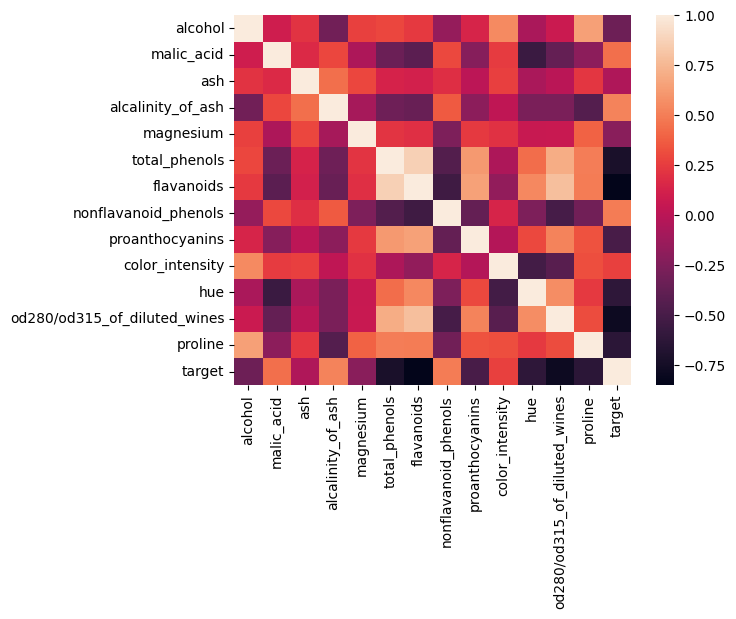

In [ ]:
import seaborn as sns

sns.heatmap(wine_df.corr());

##**3. Classification Algorthms**

**Random Forest Classifier**

Random Forest Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



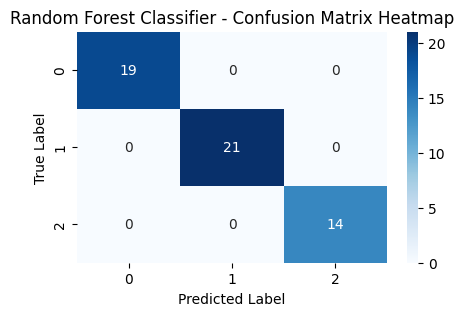

In [ ]:
# Load wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")

# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* **Accuracy:** 100%
* **Precision, Recall, F1-Score:** 1.00 for all classes
* **Evaluation:** The Random Forest classifier has achieved perfect performance on the given dataset, correctly classifying all instances. The precision, recall, and F1-score being 1.00 for all classes indicates that there are no false positives or false negatives.

**Support Vector Machine (SVM) Classifier**

Support Vector Machine (SVM) Classifier Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



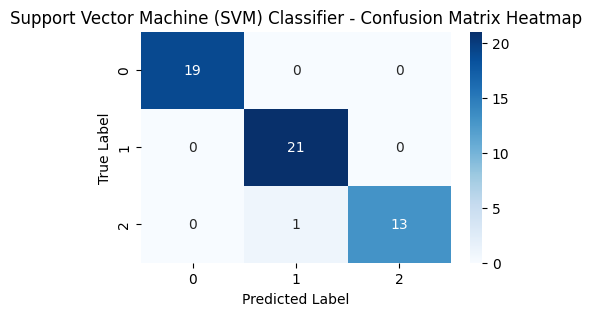

In [ ]:
# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)

# Creating the pipeline
svm_pipeline = make_pipeline(StandardScaler(), svm_model)

# Training the model
svm_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Displaying the results
print(f"Support Vector Machine (SVM) Classifier Performance:\nAccuracy: {accuracy_svm:.2f}\nClassification Report:\n{report_svm}")


# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Support Vector Machine (SVM) Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* **Accuracy:** 98%
* **Precision, Recall, F1-Score:** Slightly lower for class 2 due to one misclassification.
* **Evaluation:** The SVM has performed exceptionally well with only one instance misclassified. This suggests that the SVM's hyperplane was almost perfectly able to separate the classes.

**K-Nearest Neighbors (KNN) Classifier**

K-Nearest Neighbors (KNN) Classifier Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



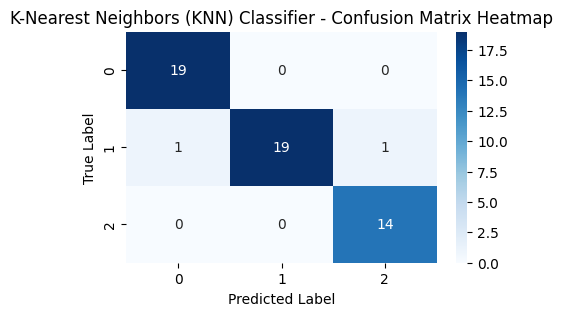

In [ ]:
# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()

# Creating the pipeline
knn_pipeline = make_pipeline(StandardScaler(), knn_model)

# Training the model
knn_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Displaying the results
print(f"K-Nearest Neighbors (KNN) Classifier Performance:\nAccuracy: {accuracy_knn:.2f}\nClassification Report:\n{report_knn}")

# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("K-Nearest Neighbors (KNN) Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


* **Accuracy:** 96%
* **Precision, Recall, F1-Score:** Good overall scores, but slightly lower for class 1 due to one instance being misclassified as class 0 and one as class 2.
* **Evaluation:** The KNN classifier has a slightly lower accuracy. The misclassifications suggest that the nearest neighbors of the misclassified points might include points from other classes, indicating some overlap in the feature space.

**Logistic Regression Classifier**

Logistic Regression Classifier Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



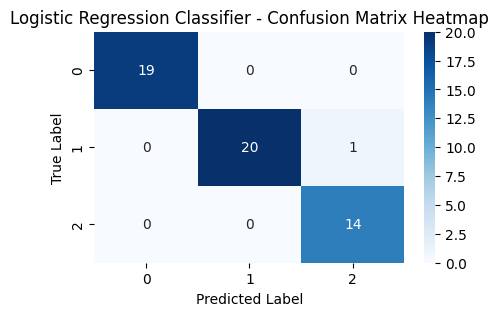

In [ ]:
# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Creating the pipeline
lr_pipeline = make_pipeline(StandardScaler(), lr_model)

# Training the model
lr_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Displaying the results
print(f"Logistic Regression Classifier Performance:\nAccuracy: {accuracy_lr:.2f}\nClassification Report:\n{report_lr}")

# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


* **Accuracy:** 98%
* **Precision, Recall, F1-Score:** Similar to SVM, with slight decrements due to misclassifications.
* **Evaluation:** Logistic Regression has also performed very well, showing that the linear decision boundary is mostly appropriate for this data. However, the misclassified instances indicate possible overlap or nonlinearity in those regions.

**Decision Tree Classifier**


Decision Tree Classifier Performance:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



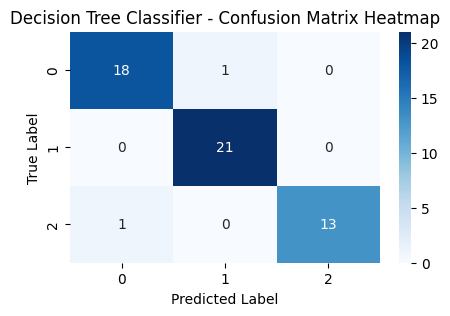

In [ ]:
# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Creating the pipeline
dt_pipeline = make_pipeline(StandardScaler(), dt_model)

# Training the model
dt_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Displaying the results
print(f"Decision Tree Classifier Performance:\nAccuracy: {accuracy_dt:.2f}\nClassification Report:\n{report_dt}")

# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


* **Accuracy:** 96%
* **Precision, Recall, F1-Score:** Lower for class 0 and 2 due to one misclassification each.
* **Evaluation:** The Decision Tree has an accuracy on par with KNN, but the nature of misclassifications is different, which may suggest that the decision boundaries for the Decision Tree are not as robust in those areas.

**Summary of The Classifier**

In [ ]:
# Dictionary to store the models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42)
}

# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization and model training
    pipeline = make_pipeline(StandardScaler(), model)

    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df.sort_values(by='Accuracy', ascending=False)


,Accuracy,Precision,Recall,F1 Score
Random Forest,1.000000,1.000000,1.000000,1.000000
Support Vector Machine,0.981481,0.982323,0.981481,0.981354
Logistic Regression,0.981481,0.982716,0.981481,0.981575
Decision Tree,0.962963,0.963805,0.962963,0.962835
K-Nearest Neighbors,0.962963,0.965123,0.962963,0.962594


Random Forest model is the best choice

## **4. Neural Network with Multilayer Perceptron(MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Creating the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Creating a pipeline for standardization and MLP model training
mlp_pipeline = make_pipeline(StandardScaler(), mlp)

# Training the MLP model
mlp_pipeline.fit(X_train, y_train)

# Making predictions with the MLP model
y_pred_mlp = mlp_pipeline.predict(X_test)

# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp)

# Displaying the performance metrics for the MLP model
print("MLP Classifier Performance:")
print(f"Accuracy: {mlp_accuracy:.2f}")
print("Classification Report:")
print(mlp_report)


MLP Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



##**5. Feature Extraction Random Forest Classifier VS Neural Network with Multilayer Perceptron(MLP)**

**Random Forest Classifier**

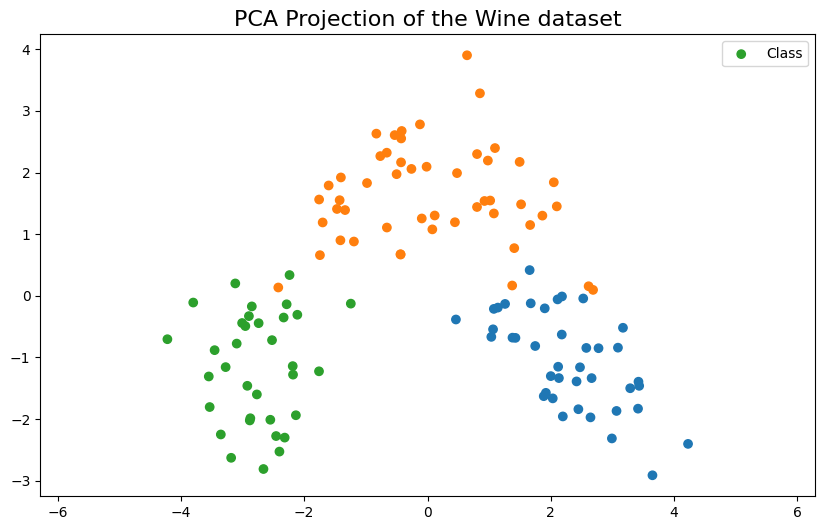

Random Forest Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# Load wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(X_train_scaled)

# Visualize PCA result
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_embedding[:, 0],
    pca_embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train],
    label="Class")
plt.gca().set_aspect('equal', 'datalim')
plt.legend()
plt.title('PCA Projection of the Wine dataset', fontsize=16)
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")



**Neural Network with Multilayer Perceptron(MLP)**

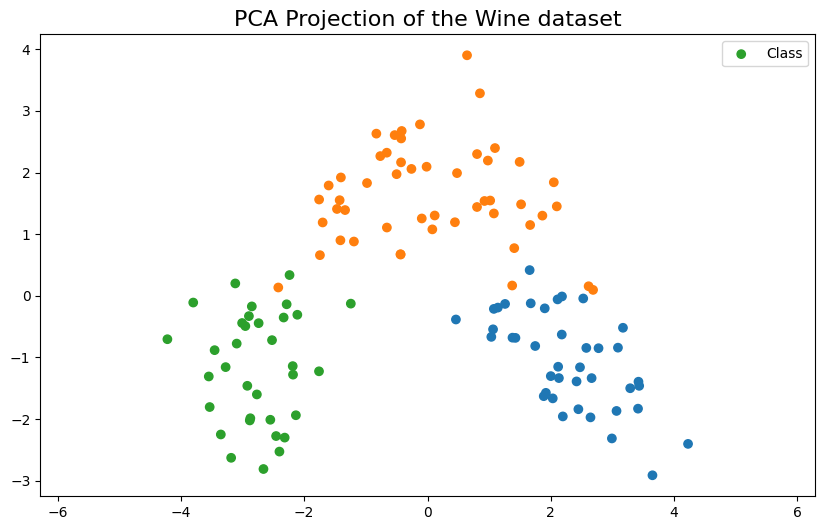

MLP Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# Load wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Splitting the dataset into training and testing sets
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(X_train_scaled)

# Visualize PCA result
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_embedding[:, 0],
    pca_embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train],
    label="Class")
plt.gca().set_aspect('equal', 'datalim')
plt.legend()
plt.title('PCA Projection of the Wine dataset', fontsize=16)
plt.show()

# Creating the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Creating a pipeline for standardization and MLP model training
mlp_pipeline = make_pipeline(StandardScaler(), mlp)

# Training the MLP model
mlp_pipeline.fit(X_train, y_train)

# Making predictions with the MLP model
y_pred_mlp = mlp_pipeline.predict(X_test)

# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp)

# Displaying the performance metrics for the MLP model
print("MLP Classifier Performance:")
print(f"Accuracy: {mlp_accuracy:.2f}")
print("Classification Report:")
print(mlp_report)

## **Analysis for anomaly detection and visualization with classes**

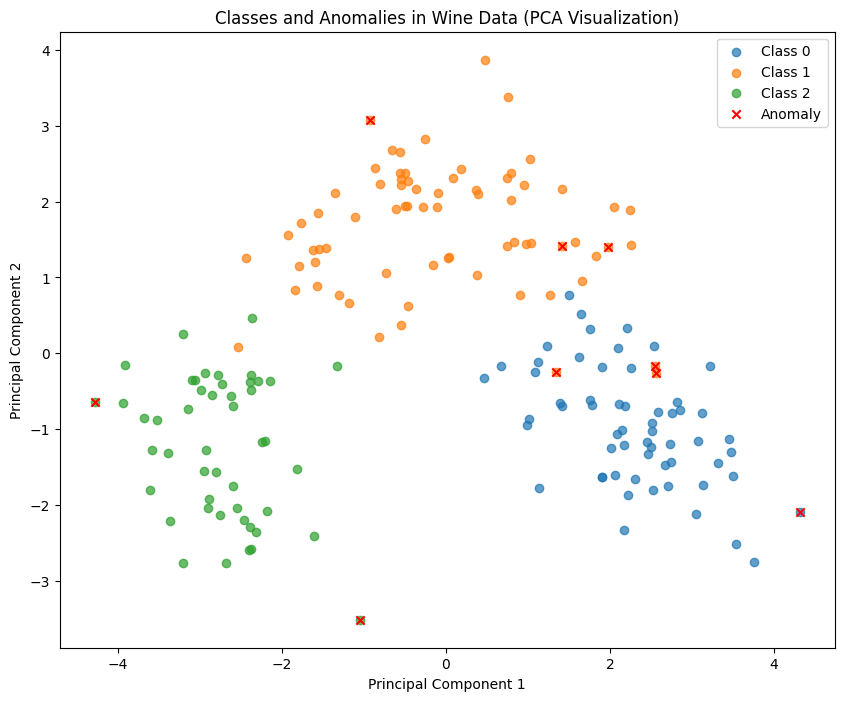

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Load wine dataset and define classes
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
y = wine_data.target  # Class labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df)

# Apply Kernel Density Estimation for anomaly detection
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X_scaled)
log_density_scores = kde.score_samples(X_scaled)
threshold = np.percentile(log_density_scores, 5)
is_anomaly = log_density_scores < threshold

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting with class labels and anomalies
plt.figure(figsize=(10, 8))

# Normal data points for each class
for class_value in [0, 1, 2]:
    plt.scatter(X_pca[y == class_value, 0], X_pca[y == class_value, 1], label=f'Class {class_value}', alpha=0.7)

# Anomalous data points
plt.scatter(X_pca[is_anomaly, 0], X_pca[is_anomaly, 1], color='red', marker='x', label='Anomaly')

plt.title('Classes and Anomalies in Wine Data (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## **Analysis of Scatter Plot**

* **Data Clusters (Classes 0, 1, 2):** The scatter plot shows three distinct groups or clusters, each representing a different class of wine. The clustering could be based on different properties or characteristics of the wines, such as chemical composition, quality, or origin.

* **Anomalies:** The points marked with red "X" are considered anomalies or outliers. These are data points that significantly deviate from the pattern of their respective classes. Anomalies can occur due to measurement errors, data entry errors, or they could represent rare events or conditions in the wine data.

## **Interpretation**

* **Clusters (Classes):** Each cluster represents a grouping of wines that share similar characteristics in the high-dimensional space. After applying PCA, these similarities are preserved as much as possible in the first two principal components, which are plotted on the x and y axes.

* **Anomalies:** The anomalies indicate wines that do not follow the general trends or patterns of their respective classes. In the context of wine data, these could be unusual wines with unique properties or they could be errors in the data.

## **Evaluation**

The PCA plot suggests a reasonable separation between the classes, indicating that PCA was successful at capturing the most significant differences in the dataset. However, the presence of anomalies, especially those lying far from their supposed clusters, could potentially affect any further analysis or model training, depending on the nature of these outliers.

In practical terms, winemakers or quality controllers could use such a PCA plot to:

* Identify and characterize different types of wine.
* Detect and investigate anomalies, which could lead to discovering unique wine characteristics or correcting data-related issues.
* Optimize the wine-making process by understanding the variables that contribute to each principal component.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

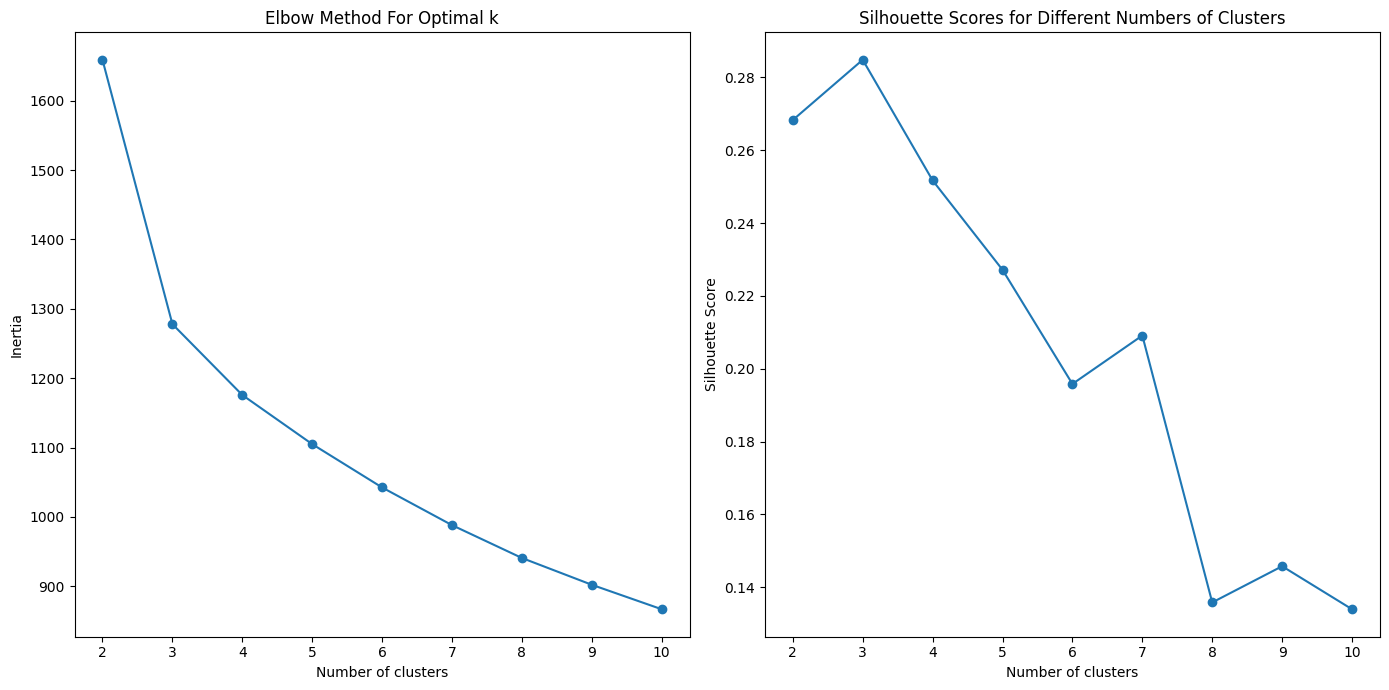

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the results of the elbow method
plt.figure(figsize=(14, 7))

# Inertia plot (elbow method)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## **Elbow Method Plot:**
*   The elbow plot shows the inertia (within-cluster sum of squares) against the number of clusters (k). The "elbow" is the point at which the inertia begins to decrease more slowly and is considered a good trade-off between the number of clusters and the compactness of the clusters.
*   From the plot, there's a noticeable elbow at k=3, suggesting that 3 clusters might be a suitable choice for this dataset.

## **Silhouette Score Plot:**
*   The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
*   The plot shows that the silhouette score peaks at k=3, after which the score starts to decrease. This further supports the choice of 3 clusters as it suggests good cluster separation and cohesion.


## **6. Confusion Matrix**

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


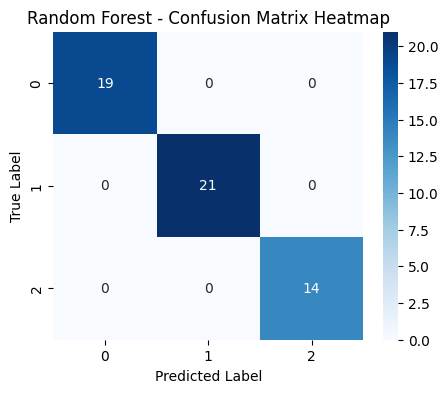

MLP Classifier Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


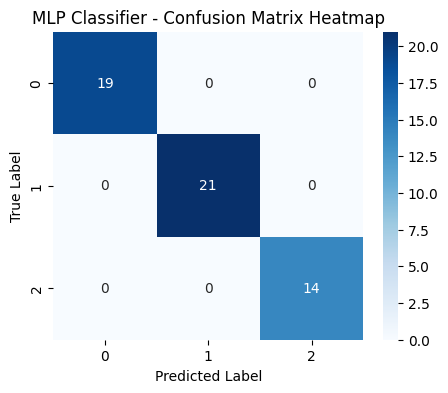

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate and display metrics for a given model
def display_model_metrics(model_pipeline, X_train, y_train, X_test, y_test, model_name):
    # Training the model
    model_pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = model_pipeline.predict(X_test)

    # Calculating metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Displaying metrics
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Visualization code
    plt.figure(figsize=(11, 4))

    # Plot for Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix Heatmap")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Add your additional visualizations here if needed

    plt.show()

# Evaluating Random Forest Classifier
display_model_metrics(rf_pipeline, X_train, y_train, X_test, y_test, "Random Forest")

# Evaluating MLP Classifier
display_model_metrics(mlp_pipeline, X_train, y_train, X_test, y_test, "MLP Classifier")


##**Analysis and Evaluation:**

* **Confusion Matrix Heatmap:** This is a visual representation of the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. The diagonal cells (from top left to bottom right) represent the number of correct predictions made by the classifier for each class.

* **Random Forest and MLP Classifiers:** Both models have predicted all instances correctly, as indicated by the non-zero numbers along the diagonal and zeros elsewhere. This suggests that for the given dataset, both the Random Forest and MLP classifiers were able to perfectly distinguish between the three classes.

## **Metrics:**
* **Accuracy:** The ratio of correctly predicted observations to the total observations. An accuracy of 1.00 means that every prediction made by the model was correct.

* **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. A precision of 1.00 indicates there were no false positives.

* **Recall (Sensitivity):** The ratio of correctly predicted positive observations to the all observations in actual class. A recall of 1.00 indicates there were no false negatives.

* **F1 Score:** The weighted average of Precision and Recall. This score takes both false positives and false negatives into account. An F1 score of 1.00 is the best score possible, suggesting a perfect balance between precision and recall.

## **Interpretation**

**Perfect Metrics:** While the perfect scores across all metrics suggest exceptional model performance, in practical scenarios, such results are rare and could indicate certain conditions:

* The dataset might be very clean and well-segmented, with clear boundaries between classes, making it easy for models to classify.

* The models might be overfitting to the training data, especially if the dataset is small or not diverse enough, which means they might not perform as well on unseen data.

* The test set could be too easy or not representative of the real-world complexity of the data.

**Model Comparison:** Since both models achieved perfect metrics, there's no distinction in performance based on the provided data. However, in real-world applications, the choice between a Random Forest and an MLP might depend on factors like the nature of the data, the computational resources available, the need for model interpretability, and the amount of training data.

## **Conclusion:**
The provided confusion matrices and metrics indicate that both the Random Forest and MLP classifiers have performed with perfect accuracy on the given dataset. While these results are ideal, it is important to consider the potential for overfitting and to validate these models on a separate, possibly more challenging dataset to ensure that they generalize well to new, unseen data. Additionally, understanding the feature space, the complexity of the data, and the distribution of the classes would be critical in evaluating whether these results are truly indicative of model performance.

## **7. Compare the models**




In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6549d385ba9f11d99ccfa29dacd322b6370eb2acd4243c4ba42f29eb62ba6b89
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



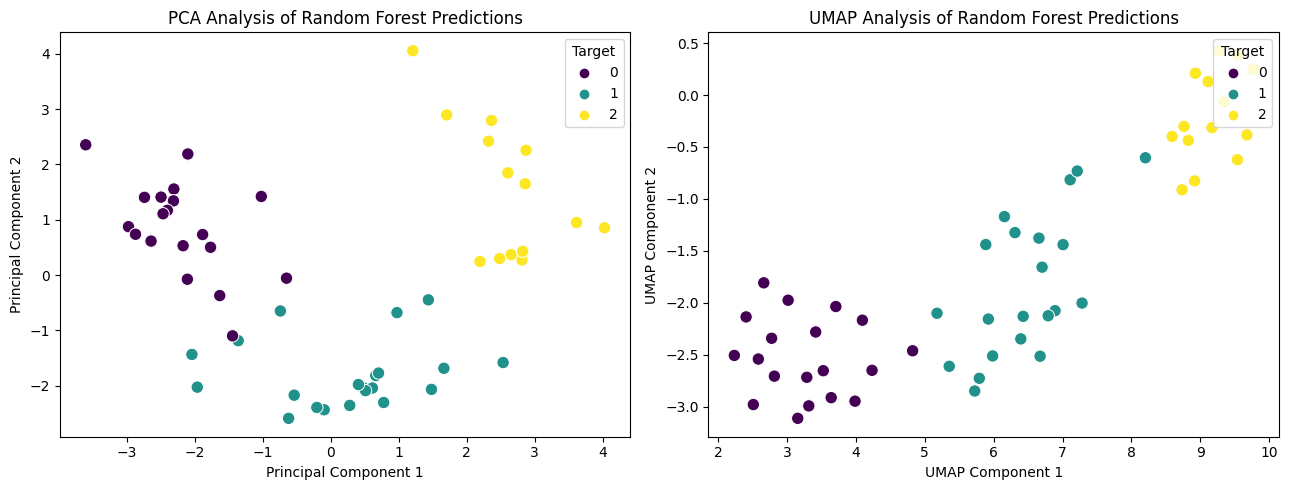

MLP Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



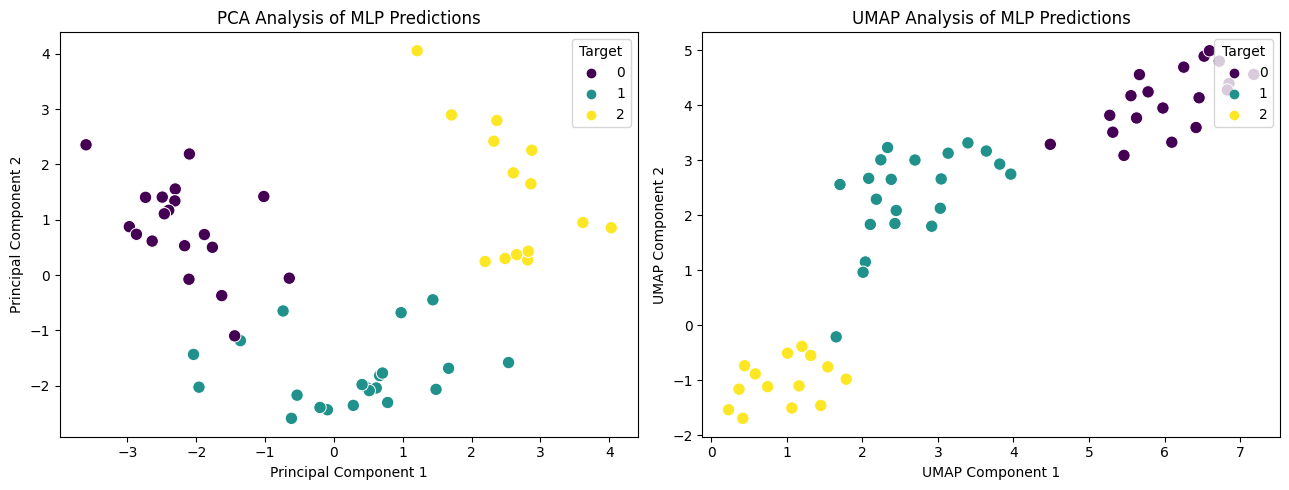

In [ ]:
# Function to calculate and display classification metrics
from umap import UMAP
def calculate_classification_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Applying dimensionality reduction and calculating metrics for each specified model
for name, model in models.items():
    # Standardize data and train model
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    X_test_scaled = pipeline.named_steps['standardscaler'].transform(X_test)

    # Making predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate and display classification metrics
    calculate_classification_metrics(y_test, y_pred, name)

    # Apply PCA for feature extraction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_test_scaled)

    # Apply UMAP for feature extraction
    umap = UMAP(n_components=2)
    X_umap = umap.fit_transform(X_test_scaled)

    # Plot PCA and UMAP side by side
    plt.figure(figsize=(13, 5))

    # Plot PCA
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test, palette='viridis', s=80)
    plt.title(f'PCA Analysis of {name} Predictions')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Target', loc='upper right')

    # Plot UMAP
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_test, palette='viridis', s=80)
    plt.title(f'UMAP Analysis of {name} Predictions')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Target', loc='upper right')

    plt.tight_layout()
    plt.show()


##**Random Forest vs. Neural Network (MLP)**
 **Random Forest (RF)**

* **Algorithm:** Ensemble learning method that operates by constructing multiple decision trees during training.
* **Strengths:** Good for handling tabular data, robust to outliers, and can handle non-linear relationships. Provides feature importance scores which are useful for interpretability.
* **Weaknesses:** Can become complex and overfit if not tuned properly. Less effective on very high-dimensional, sparse data.

 **Neural Network (MLP)**
* **Algorithm:** Consists of layers of interconnected nodes or neurons, where each connection has a weight that is adjusted during training.
*  **Strengths:** Highly effective on complex and non-linear patterns. Can approximate any function given
sufficient data and neurons.
*  **Weaknesses:** Requires more data to generalize well, can overfit, and is often considered a black box, making interpretability difficult.


Both models can achieve high performance on a variety of tasks. The choice between them typically depends on the specific characteristics of the data, the required interpretability of the model, and computational resources.

## **Random Forest and MLP Performance**
* **Random Forest:** An ensemble method that is known for handling a variety of data types and feature interactions effectively. Its perfect scores suggest it has formed a consensus among decision trees that robustly classifies all instances correctly.

* **MLP:** A neural network that can capture complex, non-linear patterns in the data. The perfect scores imply that the MLP has successfully learned the underlying data manifold.

## **Comparing Classifiers**
When two classifiers achieve perfect performance, the comparison needs to go beyond standard metrics:

* **Model Complexity:** MLPs are typically more complex and may require more data to generalize well, while Random Forests can often achieve good performance with less data.

* **Interpretability:** Random Forests offer more interpretability through feature importance scores, while MLPs are generally considered black boxes.

* **Computation Time:** Training MLPs can be computationally intensive, particularly as the architecture's complexity increases.

* **Robustness:** Random Forests are less sensitive to the curse of dimensionality and are robust to overfitting, especially when the number of trees is large.

## **Evaluation in the Context of Dimensionality Reduction**
Given that dimensionality reduction techniques were applied before classification, the performance of these classifiers also speaks to the effectiveness of PCA and UMAP:

* **With PCA:** The linear reduction might lose some information, but the perfect scores suggest that the essential information for classification was retained.

* **With UMAP:** The preservation of local structures might have facilitated even clearer class separations, which both classifiers capitalized on.

## **Conclusion**
In conclusion, both the Random Forest and MLP classifiers have demonstrated an excellent ability to classify the data after dimensionality reduction with PCA and UMAP. Their performance suggests that the key features necessary for classification are well-represented in both reduced-dimensional spaces.

Given the identical performance, the choice between using a Random Forest or an MLP for this particular dataset may come down to factors like the need for interpretability, computational resources, and preference for linear vs. non-linear models. It’s also worth noting that perfect performance on one dataset does not guarantee the same result on another; thus, these findings should be validated on new data to ensure the models' robustness and generalization capabilities.